In [ ]:
# Import required libraries
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re
import nltk
import numpy as np

In [ ]:
# Ensure necessary NLTK data is available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

# Load 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

In [ ]:
# Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W', ' ', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

processed_docs = [preprocess_text(doc) for doc in documents]
# Vectorize the preprocessed documents
vectorizer = CountVectorizer()  # You can also use TfidfVectorizer here
doc_term_matrix = vectorizer.fit_transform(processed_docs)



In [ ]:
# Train the LDA model
num_topics = 10  # Set the desired number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(doc_term_matrix)

# Number of words to display per topic
num_words = 10

# Get the vocabulary of the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Extracting and printing the top words for each topic
print("List of Words in Each Topic Discovered by LDA:")

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nTopic {topic_idx+1}:")
    top_words_idx = topic.argsort()[::-1][:num_words]
    top_words = [feature_names[i] for i in top_words_idx]
    print(" ".join(top_words))

List of Words in Each Topic Discovered by LDA:

Topic 1:
com lines subject edu organization writes posting article host nntp

Topic 2:
space nasa one gov would also organization may us subject

Topic 3:
edu subject lines organization windows university com use system file

Topic 4:
edu com would writes people article subject lines organization one

Topic 5:
ax max gv bf pl di tm ei bhj giz

Topic 6:
edu god subject lines organization one would writes com article

Topic 7:
people armenian one turkish armenians government war said law world

Topic 8:
com edu subject lines organization one article writes use would

Topic 9:
edu game lines organization subject team ca university hockey year

Topic 10:
edu one subject writes lines would organization people article think


In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Load 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data
# Basic text preprocessing (like lowercasing, removing punctuation, etc.)
processed_docs = [doc.lower() for doc in documents]

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Topic Modeling with LDA
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(processed_docs)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Print topics
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}: ", [(words[i], topic[i].round(2)) for i in topic.argsort()[:-top_n - 1:-1]])

print_topics(lda, vectorizer)


Topic 0:  [('edu', 12382.07), ('com', 5254.96), ('writes', 4752.36), ('god', 4245.34), ('article', 4179.52), ('university', 3054.79), ('don', 2795.0), ('just', 2592.45), ('think', 2439.35), ('like', 2388.54)]
Topic 1:  [('ax', 62416.2), ('max', 4722.61), ('israel', 1381.55), ('g9v', 1203.13), ('b8f', 1148.68), ('a86', 1030.14), ('turkish', 1027.82), ('armenian', 1010.98), ('145', 920.56), ('israeli', 896.23)]
Topic 2:  [('people', 688.42), ('medical', 612.91), ('said', 575.52), ('know', 557.91), ('health', 541.1), ('children', 539.19), ('don', 517.38), ('gun', 473.33), ('like', 470.68), ('disease', 457.16)]
Topic 3:  [('edu', 16641.5), ('com', 8544.89), ('posting', 5041.73), ('host', 4933.92), ('university', 4729.89), ('nntp', 4710.56), ('writes', 3996.44), ('article', 3960.29), ('like', 3590.07), ('use', 3576.96)]
Topic 4:  [('edu', 6152.24), ('people', 6092.62), ('com', 6065.87), ('writes', 4266.53), ('don', 4095.99), ('article', 3788.74), ('just', 3529.99), ('think', 3507.88), ('lik

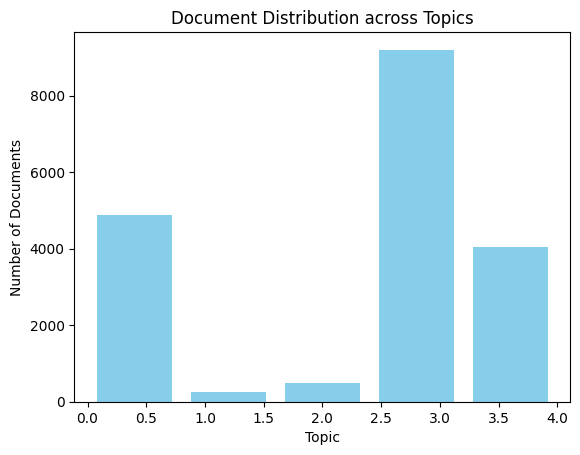

In [ ]:
# Visualize topic distribution
topic_distribution = lda.transform(doc_term_matrix)
plt.hist(topic_distribution.argmax(axis=1), bins=lda.n_components, color='skyblue', rwidth=0.8)
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Document Distribution across Topics')
plt.show()

In [ ]:
# Generate Word Embeddings with Word2Vec
word2vec_model = Word2Vec([doc.split() for doc in processed_docs], vector_size=100, window=5, min_count=2, sg=1)

In [ ]:
# Compute document embeddings by averaging word embeddings
def document_vector(doc):
    return np.mean([word2vec_model.wv[word] for word in doc.split() if word in word2vec_model.wv], axis=0)

doc_embeddings = np.array([document_vector(doc) for doc in processed_docs])

In [ ]:
# Document Similarity using Cosine Similarity
similarity_matrix = cosine_similarity(doc_embeddings)

In [ ]:
# Clustering documents using KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Explicitly setting n_init
kmeans.fit(doc_embeddings)
labels = kmeans.labels_

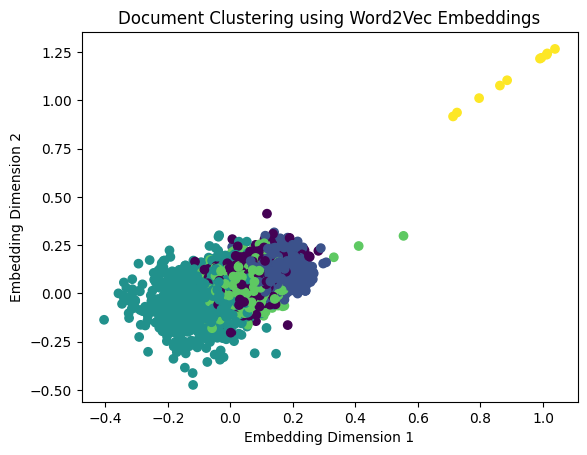

In [ ]:
# Visualize clusters (optional visualization step)
plt.scatter(doc_embeddings[:, 0], doc_embeddings[:, 1], c=labels, cmap='viridis')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.title('Document Clustering using Word2Vec Embeddings')
plt.show()

In [ ]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.9 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

# Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W', ' ', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

processed_docs = [preprocess_text(doc) for doc in documents]

# Create a dictionary and corpus for gensim
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(text) for text in processed_docs]

# LDA model using gensim
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Prepare the visualization with pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Display the visualization
pyLDAvis.display(lda_display)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
